# Credit Card Fraud Prediction

This Credit card fraud prediction model is built on the data available in Kaggle. It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

**Iroduction:**

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

**Work So far**

In this kernel I tried to predict credit card fraud by using Logistic Regression and Random Forest. Since the data is highly imbalanced I tried different sampling methods. There is still some scope of improvement left. I will concentrate on this part in the near future

In [1]:
#Importing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Importing Dataset
df=pd.read_csv('creditcard.csv')

In [4]:
# Brief Overview of the Data
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Observations**
- We can see that variables V1 to V28 are scaled by dataset providers along with that the names of these variables are not shared to maintain secrecy.
- However Variables Time and Amount are not scaled
- We have target Classes 0 (Non-Fraud) and 1(Fraud)

In [5]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Observation**
- There are no null values and no missing values in the dataset
- Datatypes of the variables are also clean
- not much of data cleaning is required

In [6]:
# Statistical summary of data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Now we need to scale the Time and Amount Variables. Except these all other variables are already scaled

Information from dataset providers:
<br>"It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise."

important piece of information
<br> https://datascience.stackexchange.com/questions/54908/data-normalization-before-or-after-train-test-split

Ideally we should be scaling after the train test split. However, Since other variables are already scaled for PCA. It makes sense scaling Time and Amount features here.

In [7]:
# Scaling of Time and Amount variables
from sklearn.preprocessing import RobustScaler

rob = RobustScaler()

df['amount'] = rob.fit_transform(df['Amount'].values.reshape(-1,1))
df['time'] = rob.fit_transform(df['Time'].values.reshape(-1,1))


# Lets drop the Time and Amount columns
df.drop(['Time','Amount'], axis=1, inplace=True)

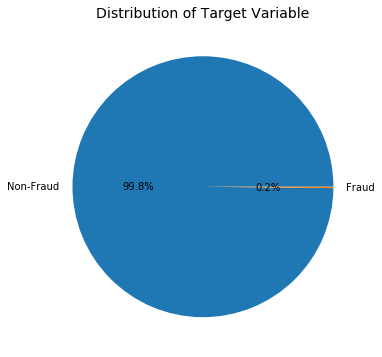

In [8]:
# Checking the Balance of the Target Class
pie, ax = plt.subplots(figsize=[10,6])
labels = ['Non-Fraud','Fraud']
plt.pie(x=round(df['Class'].value_counts()/len(df) * 100,2), labels=labels,autopct="%.1f%%", pctdistance=0.5)
plt.title("Distribution of Target Variable", fontsize=14)
plt.show()

In [9]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

we can see that Target class is highly imbalanced where 99.8% of the cases are non fraud cases. 
<br>Such an imbalance in data can lead to overfitting. Our model will be biased towards non fraud cases
<br>Let us check following options:

(1) Without resampling

(2) Under Sampling

(3) Over Sampling

## 1. Without Resampling

### 1.1 Logistic Regression

In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

X = df.drop('Class',axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

parameters = {
    'C': np.linspace(1, 10, 10)
             }
logmodel = LogisticRegression()
clf = GridSearchCV(logmodel, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train, y_train.ravel())

clf.best_params_


Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'C': 1.0}

In [11]:
logmodel1 = LogisticRegression(C=1,penalty='l2', verbose=5)
logmodel1.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s finished


LogisticRegression(C=1, verbose=5)

#### Predictions and Evaluations

In [12]:
predictions = logmodel1.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56859
           1       0.91      0.61      0.73       103

    accuracy                           1.00     56962
   macro avg       0.96      0.81      0.87     56962
weighted avg       1.00      1.00      1.00     56962



**Observation:**
Fraud cases have a recall of 61% that means of all the Fraud cases only 61% are correctly predicted.

Lets see if we can better this with Under Sampling. However based on the information below we will have to device a strategy for under sampling

Downsampling generally tends to result in overfitting within whatever model we create. For example if most fraudsters commit fraud on amount >€3000, then our Under-sampled data shows all frauds with >€3000 and the Non-Frauds as a random sample of the huge Non-Fraud population, where overwhelming majority of transactions might be ~ €100. So eventually we will have a dataset with all 1s having avg Amount €3000 and all 0s having avg amount ~€100. Hence, very highly separable!

What are the options?

(1) 50-50 ---> 492 cases of Fraud and 492 Cases of Non Fraud:
<br>a) Since we are are considering all Fraud Cases here, model will overfit resulting in bad outcome when tested against original population as we have consumed entire set of 492 Fraud Cases in training.
<br>b) Out of 284k cases we are considering only 492 cases which would result in information loss

(2) We can therefore create a downsampled dataset by retaining a stratified 92(~20%)Fraud cases within original dataset as holdout, and create a downsampled data with remaining 400 Fraud Cases together with Non-Fraud cases in 90%-10% Combination (giving more weightage to the Non-Fraud Cases, even in downsampled data).

That means
<br>df_Fraud:400 Cases & df_NonFraud:3600 cases. All the remaining cases will stay in Validation DataFrame (df_validn)

**Nice read**
<br> https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/

## 2. Under Sampling

**Steps to prepare training and validation Dataframes**
<br>*To avoid test cases creeping into train cases we will have to split the dataframe into Validation and train dataframes separately and then go on with resampling(Downsampling in this case)*
- Split the data into 2 parts: df_Fraud(Target class 1) & df_NonFraud(Target class 0)
- Shuffle both DataFrames
- Pick only 400 Fraud cases into Fraud train DataFrame
- Pick first 3600 cases from shuffled NonFraud train DataFrame (90%-10% combination of NonFraud and Fraud cases in downsampled dataset)
- Remaining cases will go into Validation dataframes for Fraud and Non Fraud
- Concatinate dataframes to form Validation and train dataframes
- Shuffling the Combined DataFrame

In [13]:
#Lets split the data into 2 parts: df_Fraud & df_NonFraud
df_Fraud=df[df.Class==1]
df_NonFraud=df[df.Class==0]

# Lets Shuffle the Fraud and Non-Fraud DataFrames
from sklearn.utils import shuffle
df_Fraud = shuffle(df_Fraud)
df_Fraud.reset_index(inplace=True, drop=True)
df_NonFraud = shuffle(df_NonFraud)
df_NonFraud.reset_index(inplace=True, drop=True)

# Lets pick 400 Fraud cases in downsampled data together with 3600(in 90%-10% combination) Non-Fraud cases. 
# This will form the train dataframe and all the remaining values will go into Validation dataframe

# Train DataFrames
df_Fraud_train=df_Fraud[:400]
df_NonFraud_train=df_NonFraud[:3600]

#Validation DataFrames
df_Fraud_validn=df_Fraud[400:]
df_NonFraud_validn=df_NonFraud[3600:]

# Combining both Fraud and Non-Fraud DataFrames to Validation and Train DataFrames
df_train=pd.concat([df_Fraud_train,df_NonFraud_train])
df_validn=pd.concat([df_Fraud_validn,df_NonFraud_validn])

#Shuffling the Combined DataFrame
df_train = shuffle(df_train)
df_train.reset_index(inplace=True, drop=True)
df_validn = shuffle(df_validn)
df_validn.reset_index(inplace=True, drop=True)

# Overview of Combined DataFrame
df_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,amount,time
0,1.560829,-1.013368,0.222265,-1.431515,-1.388715,-0.770123,-0.985883,-0.167139,-1.673531,1.470053,...,-0.386785,-0.012937,-0.162839,0.424330,-0.171833,0.024103,0.013327,0,-0.167680,-0.619544
1,0.406853,0.247479,-0.380177,-0.450693,2.069358,3.929895,-0.832316,0.044340,1.603553,-0.720463,...,-0.717517,-0.119550,0.991588,0.626249,0.354788,0.159912,0.240932,0,-0.135401,-0.951362
2,-0.724167,1.166519,0.768264,-0.066122,-0.217705,-0.562777,0.140554,0.617073,-0.547850,-0.520817,...,-0.788336,0.021337,-0.100856,-0.176246,0.082772,0.103339,0.015769,0,-0.167959,-0.178891
3,-0.911316,0.351888,0.869489,-1.423147,-0.869785,-0.152330,0.954163,-0.159831,-1.587269,0.755971,...,-0.286046,0.201495,0.185376,-0.176639,-0.575359,0.024290,0.050484,0,1.841543,-0.530199
4,-0.298067,0.941754,1.180773,0.670404,0.165205,-0.706999,1.091801,-0.187288,-0.491954,-0.529333,...,0.252905,-0.216221,0.411060,0.430908,-0.319319,0.025450,0.022515,0,0.256969,-0.302753


### 2.1 Logistic Regression

In [14]:
X = df_train.drop('Class',axis=1)
y = df_train['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

parameters = {
    'C': np.linspace(1, 10, 10)
             }
logmodel2 = LogisticRegression()
clf = GridSearchCV(logmodel2, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train, y_train.ravel())
clf.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'C': 1.0}

In [15]:
logmodel3 = LogisticRegression(C=1,penalty='l2', verbose=5)
logmodel3.fit(X_train, y_train.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


LogisticRegression(C=1, verbose=5)

#### Predictions and Evaluations
##### With Test Data

In [16]:
predictions = logmodel3.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       710
           1       0.98      0.88      0.92        90

    accuracy                           0.98       800
   macro avg       0.98      0.94      0.96       800
weighted avg       0.98      0.98      0.98       800



##### With Validation Data (remaining population)

In [17]:
#Lets Separate out Target Class from the Population
X_validn_Popln = df_validn.drop('Class',axis=1)
y_validn_Popln = df_validn['Class']

pred_Popln = logmodel3.predict(X_validn_Popln)

print(classification_report(y_validn_Popln,pred_Popln))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    280715
           1       0.08      0.82      0.14        92

    accuracy                           1.00    280807
   macro avg       0.54      0.91      0.57    280807
weighted avg       1.00      1.00      1.00    280807



### 2.2 Random Forest

In [18]:
#Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 200}

In [19]:
CV_rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=7, criterion='entropy')
CV_rfc1.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=200,
                       random_state=42)

#### Predictions and Evaluations
##### Evaluating with Test data

In [20]:
predictions = CV_rfc1.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       710
           1       0.99      0.88      0.93        90

    accuracy                           0.98       800
   macro avg       0.99      0.94      0.96       800
weighted avg       0.99      0.98      0.98       800



##### Evaluating with Original Population(Validation DataFrame)

In [21]:
pred_Popln = CV_rfc1.predict(X_validn_Popln)
print(classification_report(y_validn_Popln,pred_Popln))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    280715
           1       0.26      0.80      0.39        92

    accuracy                           1.00    280807
   macro avg       0.63      0.90      0.69    280807
weighted avg       1.00      1.00      1.00    280807



## 3. Over Sampling

- Lets check how does Over sampling perform for our case.
- we should perform Over sampling only on df_train DataFrame
- df_validn DataFrame should be left untouched to avoid overfitting

We will consider only 200 Fraud Cases for our Training set along with equal proportion of Non Fraud Cases exactly representing the Original population(99.8%-0.2%). All the remaining cases will stay with validation DataFrame

In [22]:
#Lets split the data into 2 parts: df_Fraud & df_NonFraud
df_Fraud=df[df.Class==1]
df_NonFraud=df[df.Class==0]

# Lets Shuffle the Fraud and Non-Fraud DataFrames
from sklearn.utils import shuffle
df_Fraud = shuffle(df_Fraud)
df_Fraud.reset_index(inplace=True, drop=True)
df_NonFraud = shuffle(df_NonFraud)
df_NonFraud.reset_index(inplace=True, drop=True)

# Train DataFrames
df_Fraud_train=df_Fraud[:200]
df_NonFraud_train=df_NonFraud[:round(200/0.002)]

#Validation DataFrames
df_Fraud_validn=df_Fraud[200:]
df_NonFraud_validn=df_NonFraud[round(200/0.002):]

# Combining both Fraud and Non-Fraud DataFrames to Validation and Train DataFrames
df_train=pd.concat([df_Fraud_train,df_NonFraud_train])
df_validn=pd.concat([df_Fraud_validn,df_NonFraud_validn])

#Shuffling the Combined DataFrame
df_train = shuffle(df_train)
df_train.reset_index(inplace=True, drop=True)
df_validn = shuffle(df_validn)
df_validn.reset_index(inplace=True, drop=True)

# Overview of Combined DataFrame
df_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,amount,time
0,-0.912281,-0.046583,1.432522,-1.346622,-0.827506,1.013003,-2.336704,-3.019579,-0.225768,0.343410,...,-1.480636,-2.094932,-0.348946,0.994553,-0.054214,0.464046,0.138535,0,2.487249,0.766327
1,2.111100,0.529973,-2.855060,0.493696,1.117092,-0.973020,0.274044,-0.243261,0.611078,-1.193171,...,0.255346,-0.099226,-0.195407,0.362483,-0.088946,0.011381,0.006377,0,-0.293440,0.510039
2,-1.173508,-0.972200,0.014131,-0.646410,-2.588478,1.011115,1.513677,-2.391082,1.674079,-1.505965,...,-0.705146,-2.615818,0.149687,0.193488,1.270039,0.613645,0.052868,0,13.665898,0.134271
3,1.238839,-0.150034,0.188254,-0.300057,-0.323609,-0.201555,-0.296069,0.141340,0.197968,-0.028027,...,-0.233095,0.039172,-0.269361,0.140477,0.997069,-0.079332,-0.016200,0,-0.297771,-0.022474
4,-3.352130,-6.519216,0.441358,-1.035620,4.086863,-4.349348,-3.966769,0.214478,0.318892,0.985043,...,0.280237,1.623202,-0.146730,-1.888590,-0.659871,0.143194,0.469116,0,0.922239,0.063969


### 3.1 Logistic Regression

In [23]:
import sklearn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)

X = df_train.drop('Class',axis=1)
y = df_train['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

parameters = {
    'C': np.linspace(1, 10, 10)
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train_res, y_train_res.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=3,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             verbose=5)

In [25]:
clf.best_params_

{'C': 5.0}

In [26]:
lr1 = LogisticRegression(C=5,penalty='l2', verbose=5)
lr1.fit(X_train_res, y_train_res.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s finished


LogisticRegression(C=5, verbose=5)

#### Predictions and Evaluations
##### Evaluating with Test data

In [27]:
y_pred = lr1.predict(X_test)
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[19365   637]
 [    0    38]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     20002
           1       0.06      1.00      0.11        38

    accuracy                           0.97     20040
   macro avg       0.53      0.98      0.55     20040
weighted avg       1.00      0.97      0.98     20040



#### Evaluation with Validation Dataframe

In [28]:
#Lets Separate out Target Class from the Population
X_validn_Popln = df_validn.drop('Class',axis=1)
y_validn_Popln = df_validn['Class']

pred_Popln = lr1.predict(X_validn_Popln)
print(confusion_matrix(y_validn_Popln,pred_Popln))

print(classification_report(y_validn_Popln,pred_Popln))

[[178048   6267]
 [    22    270]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    184315
           1       0.04      0.92      0.08       292

    accuracy                           0.97    184607
   macro avg       0.52      0.95      0.53    184607
weighted avg       1.00      0.97      0.98    184607



### 3.2 Random Forest

In [37]:
#Create an instance of the RandomForestClassifier class and fit it to our training data.
CV_rfc3=RandomForestClassifier(n_estimators=1000, min_samples_split=10, min_samples_leaf=1,
           max_features='auto', max_leaf_nodes=None,
           oob_score=True, n_jobs=-1, random_state=1)
CV_rfc3.fit(X_train_res, y_train_res.ravel())

RandomForestClassifier(min_samples_split=10, n_estimators=1000, n_jobs=-1,
                       oob_score=True, random_state=1)

#### Predictions and Evaluations
##### Evaluating with Test data

In [38]:
predictions = CV_rfc3.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20002
           1       0.92      0.89      0.91        38

    accuracy                           1.00     20040
   macro avg       0.96      0.95      0.95     20040
weighted avg       1.00      1.00      1.00     20040



##### Evaluating with Original Population(Validation DataFrame)

In [39]:
pred_Popln = CV_rfc3.predict(X_validn_Popln)
print(classification_report(y_validn_Popln,pred_Popln))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    184315
           1       0.88      0.83      0.86       292

    accuracy                           1.00    184607
   macro avg       0.94      0.92      0.93    184607
weighted avg       1.00      1.00      1.00    184607



# Conclusion:

![title](Table.png)

- The data to start with was highly imbalanced with Target Class = Fraud contributing only 0.2% (492 Cases) where as remaining 99.8% of the data was Non Fraud. 
- Logistic Regression performed on Without resampling case yields a recall of 61% which means out of all the Fraud cases only 61% are predicted correctly
- Under sampling doesn't seem to be working(both with Logistic regression and Random forest) with a maximum precision of 26%. Which means out of all the cases which are predicted to be Fraud only 26% are Actually Fraud. Remaining 74% are the Non-Fraud cases wrongly classified as Frauds.
- Logistic Regression in Over sampling doesn't throw encouraging results either however **Random Forest in Over Sampling** (Performed with SMOTE) gives much better result with 88% Precision and 83% of Recall.
- We can therefore settle with Random Forests for Over Sampling.
- I will explore other methods in future.